A simple GARCH estimation (https://machinelearningmastery.com/develop-arch-and-garch-models-for-time-series-forecasting-in-python/)

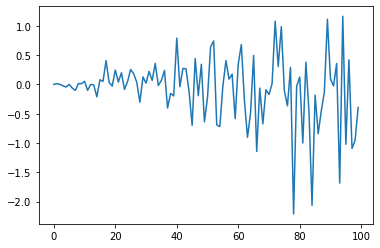

In [1]:
# create a simple white noise with increasing variance
from random import gauss
from random import seed
from matplotlib import pyplot
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf # for acf plots

# seed pseudorandom number generator
seed(1)

# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]

# plot
pyplot.plot(data)
pyplot.show()

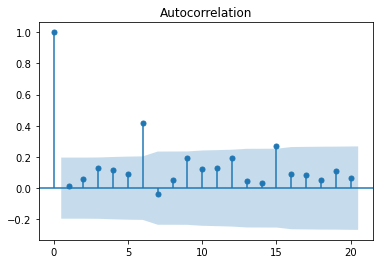

In [2]:
# square the dataset
squared_data = [x**2 for x in data]
squared_data = np.array(squared_data)

# create acf plot
plot_acf(squared_data)
pyplot.show()

## ARCH model

In [3]:
from arch import arch_model

In [5]:
# split into train/test
n_test = 10
train, test = data[:-n_test], data[-n_test:]

# define model
model = arch_model(train, mean='Zero', vol='ARCH', p=15)

# fit model
model_fit = model.fit()

# forecast the test set
yhat = model_fit.forecast(horizon=n_test, reindex=False)

Iteration:      1,   Func. Count:     18,   Neg. LLF: 88229.21081826466
Iteration:      2,   Func. Count:     36,   Neg. LLF: 145.16342486790123
Iteration:      3,   Func. Count:     54,   Neg. LLF: 128.16575632743994
Iteration:      4,   Func. Count:     72,   Neg. LLF: 109.21743453644488
Iteration:      5,   Func. Count:     90,   Neg. LLF: 36.50573961108787
Iteration:      6,   Func. Count:    108,   Neg. LLF: 39.65738666780856
Iteration:      7,   Func. Count:    126,   Neg. LLF: 28.719726047459652
Iteration:      8,   Func. Count:    143,   Neg. LLF: 28.02027100942711
Iteration:      9,   Func. Count:    161,   Neg. LLF: 34.94722530353781
Iteration:     10,   Func. Count:    180,   Neg. LLF: 30.03624007733368
Iteration:     11,   Func. Count:    198,   Neg. LLF: 26.91679529681816
Iteration:     12,   Func. Count:    216,   Neg. LLF: 35.23299079510191
Iteration:     13,   Func. Count:    235,   Neg. LLF: 25.557783816017935
Iteration:     14,   Func. Count:    253,   Neg. LLF: 25.49

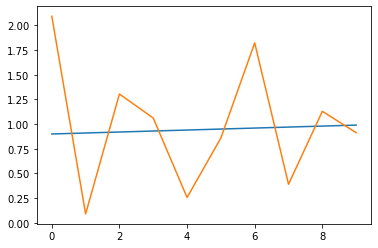

In [6]:
# plot the actual variance
var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test:])

# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()

In [7]:
yhat.variance.values[-1,:]

array([2.09288594, 0.09017704, 1.30488412, 1.06125942, 0.25690556,
       0.85993408, 1.82286956, 0.39067781, 1.130076  , 0.91277482])

## GARCH model

In [8]:
# split into train/test
n_test = 10
train, test = data[:-n_test], data[-n_test:]

# define model
model = arch_model(train, mean='Zero', vol='GARCH', p=15, q=15)

# fit model
model_fit = model.fit()

# forecast the test set
yhat = model_fit.forecast(horizon=n_test, reindex=True)

Iteration:      1,   Func. Count:     33,   Neg. LLF: 134.2317665883839
Iteration:      2,   Func. Count:     70,   Neg. LLF: 95219.42875514245
Iteration:      3,   Func. Count:    103,   Neg. LLF: 544.0651713801462
Iteration:      4,   Func. Count:    136,   Neg. LLF: 359.82260287255474
Iteration:      5,   Func. Count:    169,   Neg. LLF: 120.68468720344026
Iteration:      6,   Func. Count:    202,   Neg. LLF: 57.67993058484209
Iteration:      7,   Func. Count:    235,   Neg. LLF: 37.233844550362896
Iteration:      8,   Func. Count:    268,   Neg. LLF: 44.284908834009805
Iteration:      9,   Func. Count:    301,   Neg. LLF: 30.95579466733611
Iteration:     10,   Func. Count:    334,   Neg. LLF: 26.9575229574196
Iteration:     11,   Func. Count:    366,   Neg. LLF: 31.35798709776981
Iteration:     12,   Func. Count:    400,   Neg. LLF: 30.01446108535507
Iteration:     13,   Func. Count:    433,   Neg. LLF: 28.461078235320006
Iteration:     14,   Func. Count:    466,   Neg. LLF: 27.699

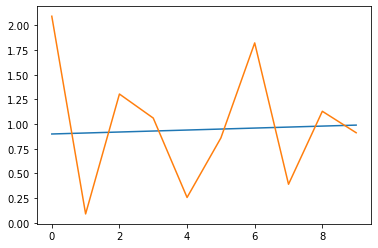

In [9]:
# plot the actual variance
var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test:])
# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()

# Another example

https://pyflux.readthedocs.io/en/latest/garch.html

Load financial TS from Yahoo Finance

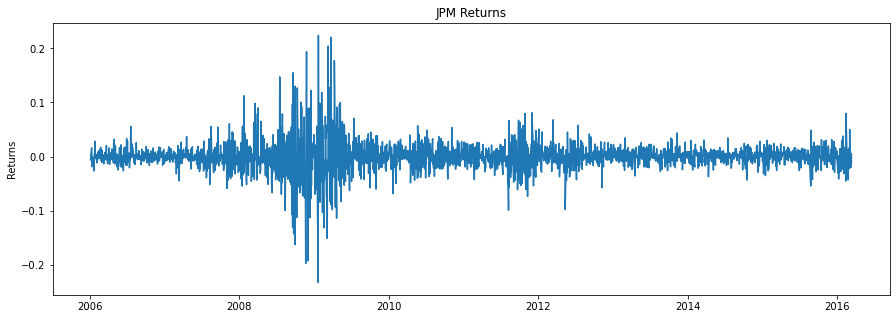

In [204]:
import numpy as np
import pyflux as pf
import pandas as pd
from pandas_datareader import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline

jpm = DataReader('JPM',  'yahoo', datetime(2006,1,1), datetime(2016,3,10))
returns = pd.DataFrame(np.diff(np.log(jpm['Adj Close'].values)))
returns.index = jpm.index.values[1:jpm.index.values.shape[0]]
returns.columns = ['JPM Returns']

plt.figure(figsize=(15,5));
plt.plot(returns.index,returns);
plt.ylabel('Returns');
plt.title('JPM Returns');

One way to visualize the underlying volatility of the series is to plot the absolute returns $|y|$:

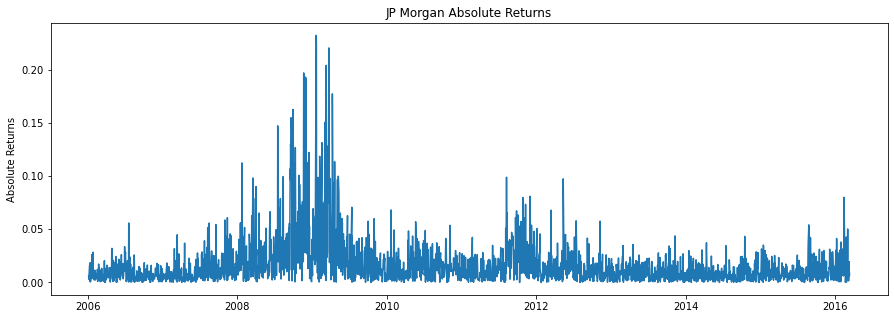

In [11]:
plt.figure(figsize=(15,5))
plt.plot(returns.index, np.abs(returns))
plt.ylabel('Absolute Returns')
plt.title('JP Morgan Absolute Returns');

There appears to be some evidence of volatility clustering over this period. Let’s fit a `GARCH(1,1)` model using a point mass estimate $z^{\text{MLE}}$:

In [205]:
# split into train/test
n_test = 10
train, test = returns[:-n_test], returns[-n_test:]

In [13]:
model = pf.GARCH(train, p=1, q=1)
x = model.fit()
x.summary()

GARCH(1,1)                                                                                                
======================================================= ==================================================
Dependent Variable: JPM Returns                         Method: MLE                                       
Start Date: 2006-01-05 00:00:00                         Log Likelihood: 6570.0371                         
End Date: 2016-02-25 00:00:00                           AIC: -13132.0743                                  
Number of observations: 2552                            BIC: -13108.6957                                  
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             0.0                                                              
q(1)                                 

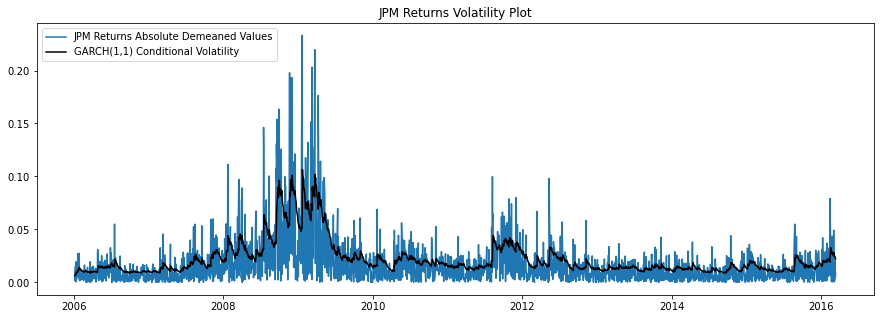

In [158]:
model.plot_fit(figsize=(15,5))

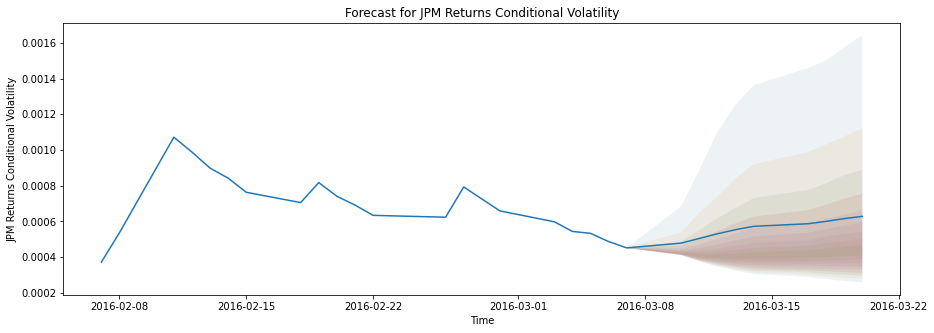

In [159]:
model.plot_predict(h=10, figsize=(15,5))

In [16]:
model.predict(h=10)

,JPM Returns
2016-02-21,0.000693
2016-02-22,0.000695
2016-02-26,0.000703
2016-02-27,0.000706
2016-02-28,0.000708
2016-02-29,0.000714
2016-03-03,0.000715
2016-03-04,0.000719
2016-03-05,0.000721
2016-03-06,0.000728


In [17]:
test = test.rename(columns={'JPM Returns': 'volatility'})

In [19]:
test["fit_volatility"] = model.predict(h=10).values

In [20]:
test

,volatility,fit_volatility
2016-02-26,0.009254,0.000693
2016-02-29,-0.021786,0.000699
2016-03-01,0.050227,0.000707
2016-03-02,0.009415,0.000713
2016-03-03,0.003341,0.000718
2016-03-04,0.001500,0.000722
2016-03-07,-0.001833,0.000723
2016-03-08,-0.019542,0.000726
2016-03-09,0.005768,0.000732
2016-03-10,-0.008664,0.000732


## Rolling GARCH estimation

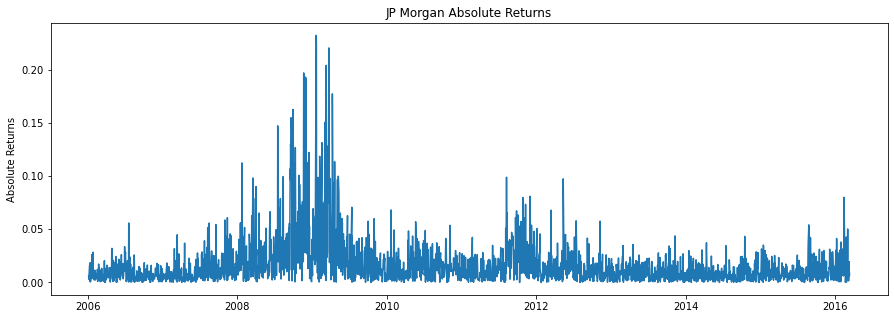

In [31]:
plt.figure(figsize=(15,5))
plt.plot(returns.index, np.abs(returns))
plt.ylabel('Absolute Returns')
plt.title('JP Morgan Absolute Returns');

In [33]:
# absolute returns as volatility target
returns["abs_ret"] = np.abs(returns)

In [216]:
fit_data = []
i = 0

In [217]:
# partition train and test data
n_test = 10 - i
if i == 10:
    train, test = returns, []
else:
    train, test = returns[:-n_test], returns[-n_test:]

# 1 step ahead forecast
model = pf.GARCH(train, p=1, q=1)
x = model.fit()
x.summary()

# increment the counter
i = i + 1
print('i = ',i)

GARCH(1,1)                                                                                                
======================================================= ==================================================
Dependent Variable: JPM Returns                         Method: MLE                                       
Start Date: 2006-01-05 00:00:00                         Log Likelihood: 6570.0371                         
End Date: 2016-02-25 00:00:00                           AIC: -13132.0743                                  
Number of observations: 2552                            BIC: -13108.6957                                  
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             0.0                                                              
q(1)                                 

In [208]:
fit_data.append(model.predict(h=1)['JPM Returns'].iloc[0])
fit_data

[0.000692856719438359]

In [218]:
model.predict(h=10)

,JPM Returns
2016-02-21,0.000693
2016-02-22,0.000699
2016-02-26,0.000704
2016-02-27,0.000709
2016-02-28,0.000716
2016-02-29,0.000725
2016-03-03,0.000725
2016-03-04,0.000727
2016-03-05,0.000731
2016-03-06,0.000729


In [210]:
test = returns[-10:]
test['fit'] = np.asarray(fit_data[:-1])

In [211]:
test

,JPM Returns
2016-02-26,0.009254
2016-02-29,-0.021786
2016-03-01,0.050227
2016-03-02,0.009415
2016-03-03,0.003341
2016-03-04,0.001500
2016-03-07,-0.001833
2016-03-08,-0.019542
2016-03-09,0.005768
2016-03-10,-0.008664


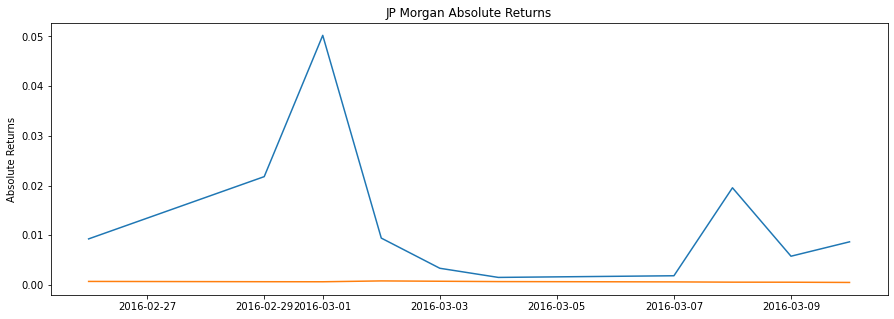

In [176]:
plt.figure(figsize=(15,5))
plt.plot(test.index, test['abs_ret'])
plt.plot(test.index, test['fit'])
# plt.plot(test.index, test['JPM Returns'])
plt.ylabel('Absolute Returns')
plt.title('JP Morgan Absolute Returns');

### try with arch package

In [212]:
train

,JPM Returns
2006-01-04,-0.005789
2006-01-05,0.003025
2006-01-06,0.007021
2006-01-09,0.016111
2006-01-10,0.001474
...,...
2016-02-19,0.000173
2016-02-22,0.012888
2016-02-23,-0.042730
2016-02-24,0.000356


In [224]:
# split into train/test
n_test = 10
train, test = returns[:-n_test], returns[-n_test:]

# define model
model1 = arch_model(train, mean='Zero', vol='GARCH', p=15, q=15)

# fit model
model_fit1 = model1.fit()

# forecast the test set
yhat = model_fit1.forecast(horizon = n_test, reindex=True)

Iteration:      1,   Func. Count:     32,   Neg. LLF: -6498.051380190509
Optimization terminated successfully    (Exit mode 0)
            Current function value: -6498.05139317851
            Iterations: 5
            Function evaluations: 32
            Gradient evaluations: 1


In [225]:
# forecast variance
yhat.variance.values[-1, :]

array([0.00051387, 0.00052469, 0.00053859, 0.000549  , 0.0005654 ,
       0.00058121, 0.00057311, 0.00050478, 0.00051039, 0.00051847])

In [232]:
yhat.variance.values[-1, :]**0.5

array([0.02266873, 0.02290602, 0.02320747, 0.02343073, 0.02377823,
       0.02410837, 0.02393964, 0.02246733, 0.02259182, 0.02276989])

In [233]:
test

,JPM Returns
2016-02-26,0.009254
2016-02-29,-0.021786
2016-03-01,0.050227
2016-03-02,0.009415
2016-03-03,0.003341
2016-03-04,0.001500
2016-03-07,-0.001833
2016-03-08,-0.019542
2016-03-09,0.005768
2016-03-10,-0.008664


# Working estimation using `arch` package

https://python.plainenglish.io/how-to-predict-stock-volatility-with-python-46ae341ce804

Import required libraries.

In [62]:
import yfinance as yf
from arch import arch_model
from arch.__future__ import reindexing
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

ticker= "aapl"
stock_data = yf.download(ticker, start="2016-01-04", end="2021-04-30")

[*********************100%***********************]  1 of 1 completed


In [63]:
stock_data['Return'] = 100 * (stock_data['Close'].pct_change())

In [64]:
stock_data.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2016-01-04,25.652500,26.342501,25.500000,26.337500,24.323219,270597600,NaN
2016-01-05,26.437500,26.462500,25.602501,25.677500,23.713696,223164000,-2.505932
2016-01-06,25.139999,25.592501,24.967501,25.174999,23.249626,273829600,-1.956968
2016-01-07,24.670000,25.032499,24.107500,24.112499,22.268383,324377600,-4.220457
2016-01-08,24.637501,24.777500,24.190001,24.240000,22.386133,283192000,0.528774


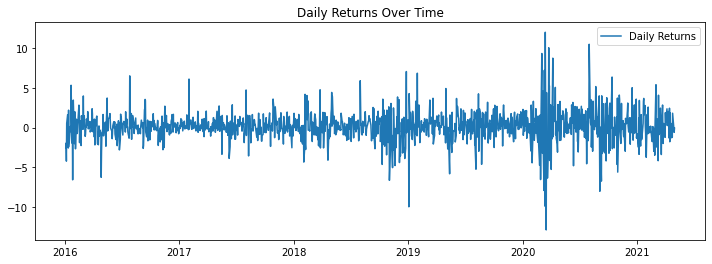

In [65]:
stock_data.dropna(inplace=True)

fig = plt.figure()
fig.set_figwidth(12)
plt.plot(stock_data['Return'], label = 'Daily Returns')
plt.legend(loc='upper right')
plt.title('Daily Returns Over Time')
plt.show()

Volatility calculation

In [66]:
daily_volatility = stock_data['Return'].std()
print('Daily volatility: ', '{:.2f}%'.format(daily_volatility))

monthly_volatility = math.sqrt(21) * daily_volatility
print ('Monthly volatility: ', '{:.2f}%'.format(monthly_volatility))

annual_volatility = math.sqrt(252) * daily_volatility
print ('Annual volatility: ', '{:.2f}%'.format(annual_volatility ))

Daily volatility:  1.90%
Monthly volatility:  8.73%
Annual volatility:  30.23%


### Building GARCH model

In [67]:
garch_model = arch_model(stock_data['Return'], p = 1, q = 1,
                      mean = 'constant', vol = 'GARCH', dist = 'normal')

gm_result = garch_model.fit(disp='off')
print(gm_result.params)

print('\n')

gm_forecast = gm_result.forecast(horizon = 5, )
print(gm_forecast.variance[-1:])

mu          0.225177
omega       0.182085
alpha[1]    0.152567
beta[1]     0.797895
Name: params, dtype: float64


                 h.1       h.2       h.3       h.4       h.5
Date                                                        
2021-04-29  1.584047  1.687662  1.786143  1.879746  1.968712


###  Rolling forecast using GARCH model

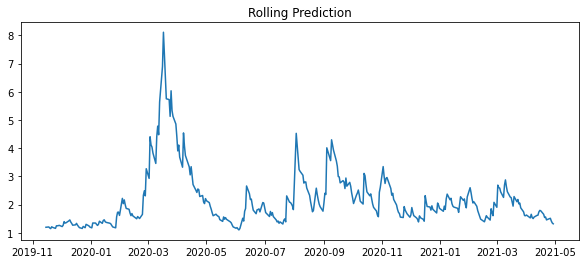

In [71]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = stock_data['Return'][:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))
    
rolling_predictions = pd.Series(rolling_predictions, index=stock_data['Return'].index[-365:])

plt.figure(figsize=(10,4))
plt.plot(rolling_predictions)
plt.title('Rolling Prediction')
plt.show()

In order to gain a better picture of how accurate our GARCH model in predicting the volatility, let us create another subplot of daily return (true values) and overlay it with the rolling prediction line plot.

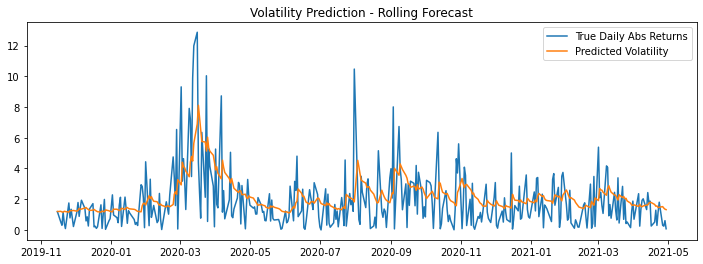

In [72]:
plt.figure(figsize=(12,4))
plt.plot(np.abs(stock_data['Return'][-365:]))
plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast')
plt.legend(['True Daily Abs Returns', 'Predicted Volatility'])
plt.show()

In [73]:
result = pd.concat([np.abs(stock_data['Return'][-5:]), rolling_predictions[-5:]], axis = 1)
result.columns = ['abs_ret', 'prediction']
result

,abs_ret,prediction
Date,,
2021-04-23,1.803854,1.474744
2021-04-26,0.297792,1.516030
2021-04-27,0.244954,1.420146
2021-04-28,0.602722,1.350847
2021-04-29,0.074866,1.319882
